# Generate Graphs

## Append time vector in the last row

In [49]:
import pandas as pd

def add_seconds_column(input_file, output_file):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Create a new 'seconds' column with incremented values
    df['seconds'] = range(len(df))

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print("New column 'seconds' has been added and incremented successfully!")


# Usage example
input_file = 'input.csv'  # Replace with your input CSV file
output_file = 'output.csv'  # Replace with the desired output CSV file

add_seconds_column(input_file, output_file)


New column 'seconds' has been added and incremented successfully!


## Delete rows

In [50]:
def remove_column(input_file, output_file, column_index):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Remove the column based on the column index
    df.drop(df.columns[column_index], axis=1, inplace=True)

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print(f"Column at index {column_index} has been removed successfully!")

for i in range(4):
    remove_column(output_file, output_file, 8)


Column at index 8 has been removed successfully!
Column at index 8 has been removed successfully!
Column at index 8 has been removed successfully!
Column at index 8 has been removed successfully!


## Convert Humi and temp data

In [69]:
def multiply_and_add_column(input_file, output_file, column_name, multiply_constant, add_constant):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Multiply the column values by the multiply_constant and add the add_constant
    df[column_name] = df[column_name] * multiply_constant + add_constant

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print(f"Column '{column_name}' has been multiplied by {multiply_constant} and added with {add_constant} successfully!")

output_file = 'input.csv'
# multiply_and_add_column(output_file, output_file, 'temp', 165.0/65535.0, -40)
# multiply_and_add_column(output_file, output_file, 'humid', 100.0/65535.0, 0)

channel_list = ['ads1_ch0','ads1_ch1','ads1_ch2','ads1_ch3','ads2_ch0','ads2_ch1','ads2_ch2','ads2_ch3']
for i in channel_list:
    multiply_and_add_column(output_file, output_file, i, 1.2/pow(2,23), 0)

Column 'ads1_ch0' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!
Column 'ads1_ch1' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!
Column 'ads1_ch2' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!
Column 'ads1_ch3' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!
Column 'ads2_ch0' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!
Column 'ads2_ch1' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!
Column 'ads2_ch2' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!
Column 'ads2_ch3' has been multiplied by 1.430511474609375e-07 and added with 0 successfully!


## Appen RS Values

In [70]:
import pandas as pd

def convert_rs_and_add_column(input_file, output_file, voltage_column_index):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Multiply the column values by the multiply_constant and add the add_constant
    Vad = df[df.columns[voltage_column_index]]
    df[df.columns[voltage_column_index] + '_Rs'] = 4700*((5/(Vad+1.245))-1)

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print(f"Column '{df.columns[voltage_column_index]}' has been converted successfully!")

# convert_rs_and_add_column(output_file, output_file, 0);
for i in range(8):
    convert_rs_and_add_column(output_file, output_file, i);

Column 'ads1_ch0' has been converted successfully!
Column 'ads1_ch1' has been converted successfully!
Column 'ads1_ch2' has been converted successfully!
Column 'ads1_ch3' has been converted successfully!
Column 'ads2_ch0' has been converted successfully!
Column 'ads2_ch1' has been converted successfully!
Column 'ads2_ch2' has been converted successfully!
Column 'ads2_ch3' has been converted successfully!


## Print time series

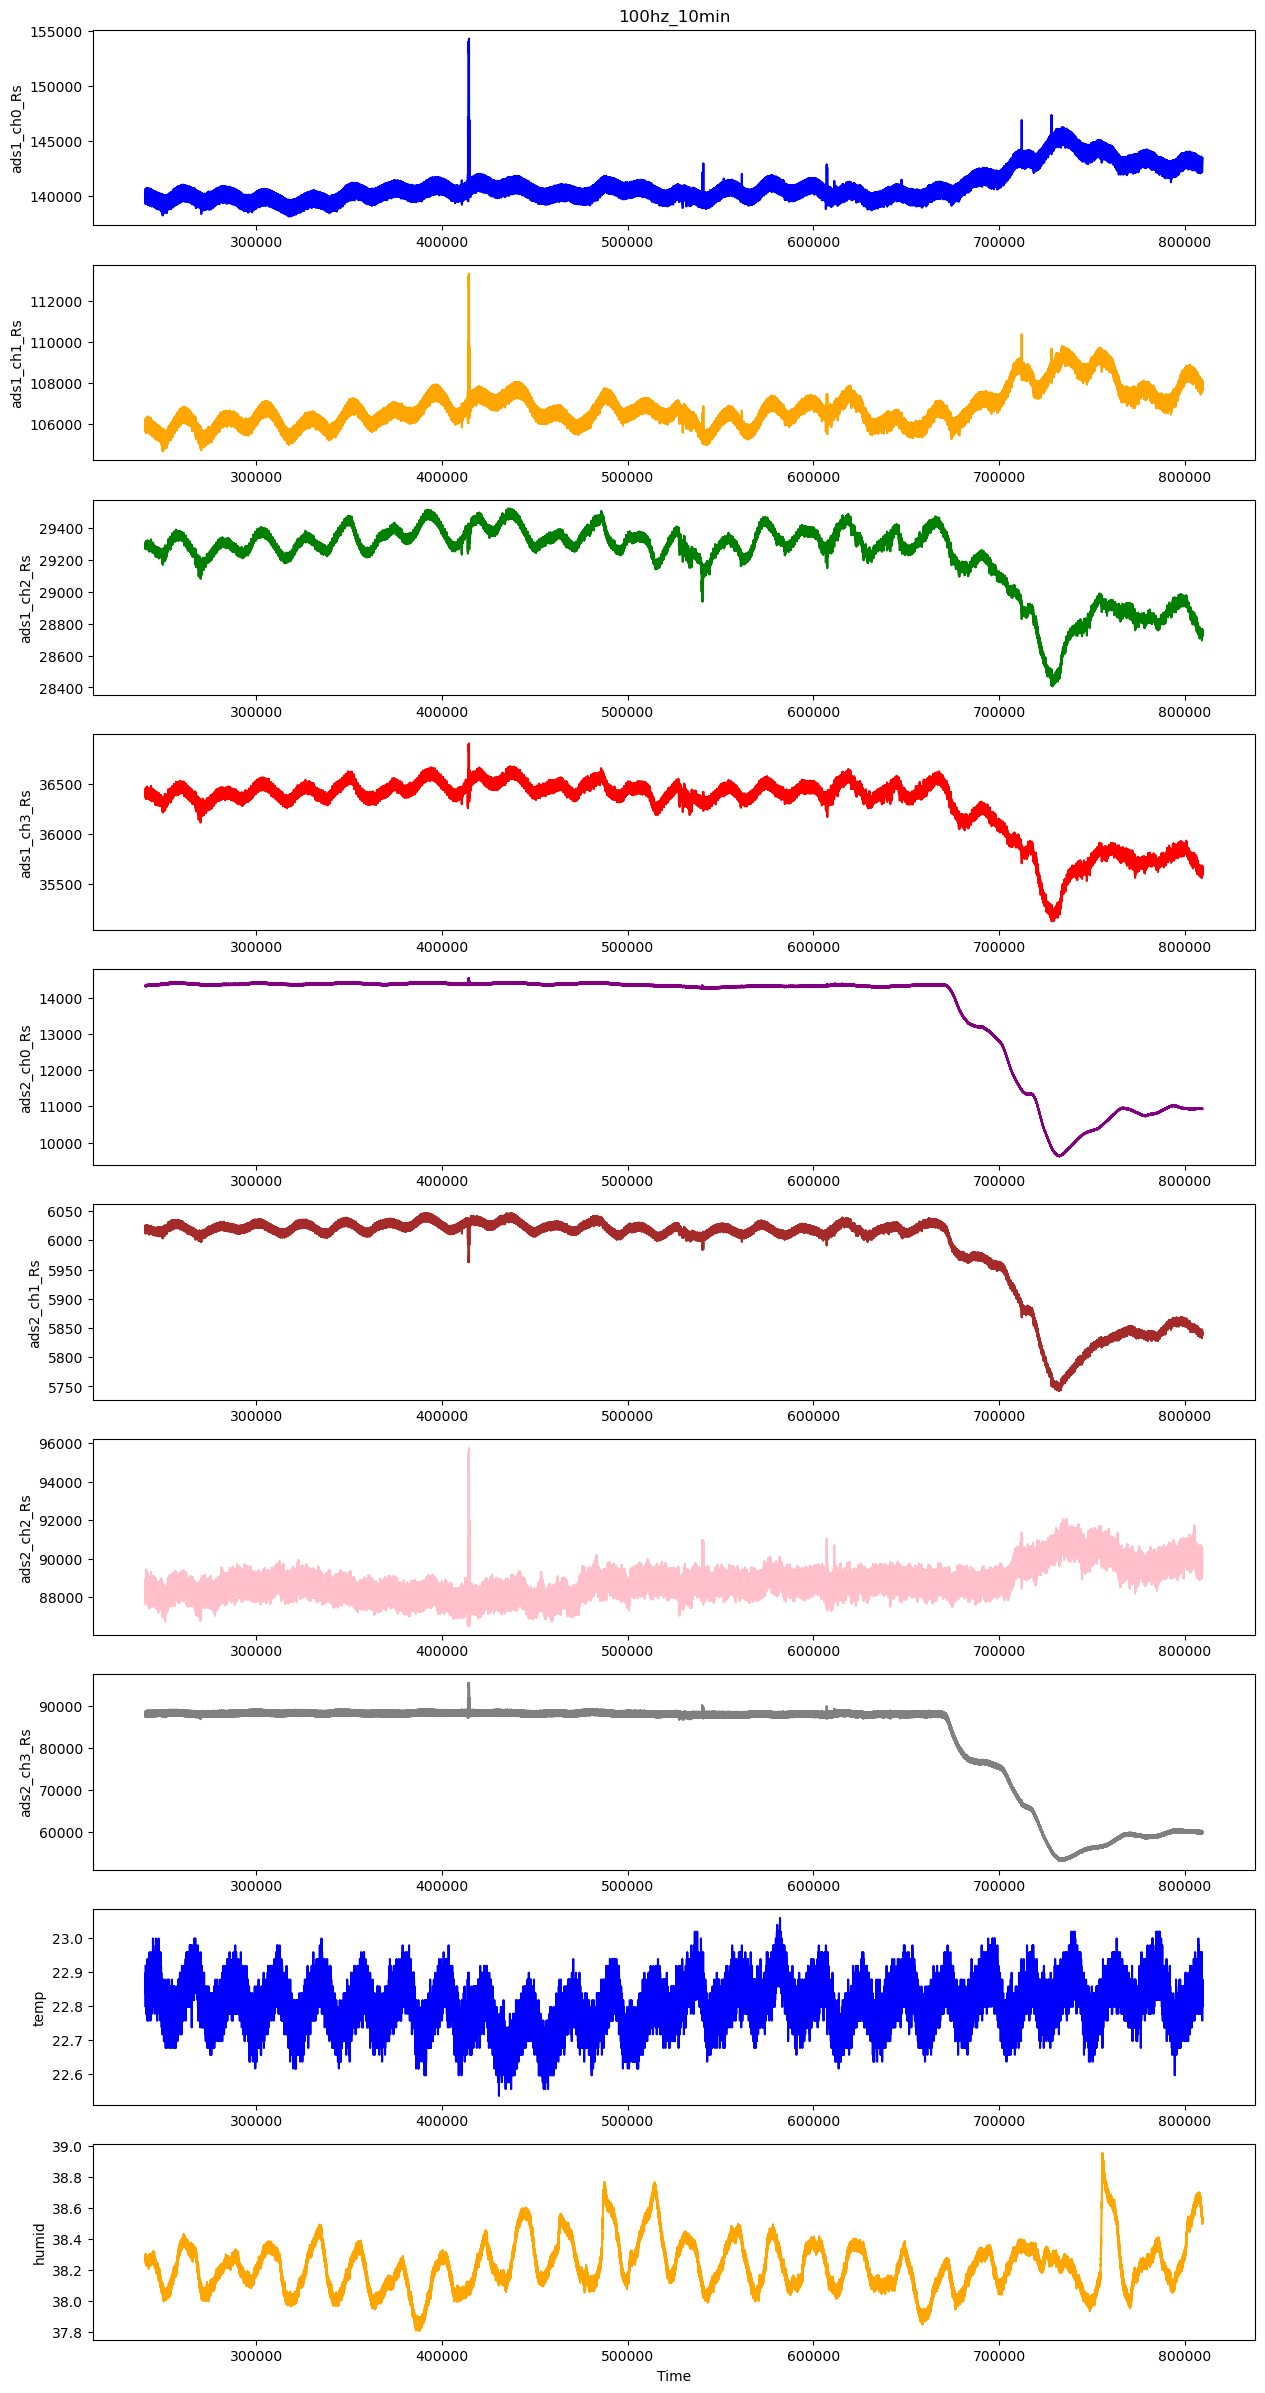

In [73]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_data_from_csv(csv_file, column_list, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract the header names as time vector and data series
    time_vector = 'seconds'
    
    # Create the figure and axis objects
    fig, ax = plt.subplots(len(column_list), figsize=(15,30))
    color_names = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
    
    ax[0].set_title(graph_name)
    for i in range(len(column_list)):
        ax[i].plot(df[time_vector], df[column_list[i]], color=color_names[i % len(color_names)])
        ax[i].set_ylabel(column_list[i])
        
    ax[i].set_xlabel('Time')
    # Show the plot
    plt.show()

channel_list = ['ads1_ch0_Rs','ads1_ch1_Rs','ads1_ch2_Rs','ads1_ch3_Rs','ads2_ch0_Rs','ads2_ch1_Rs','ads2_ch2_Rs','ads2_ch3_Rs','temp','humid']
    
plot_data_from_csv('input.csv', channel_list, '100hz_10min')


## Plot FFT

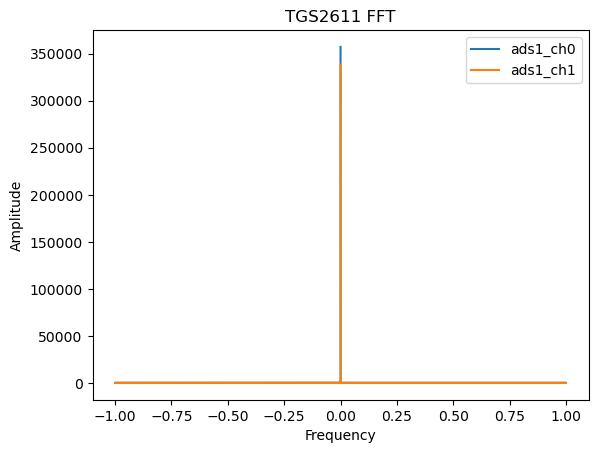

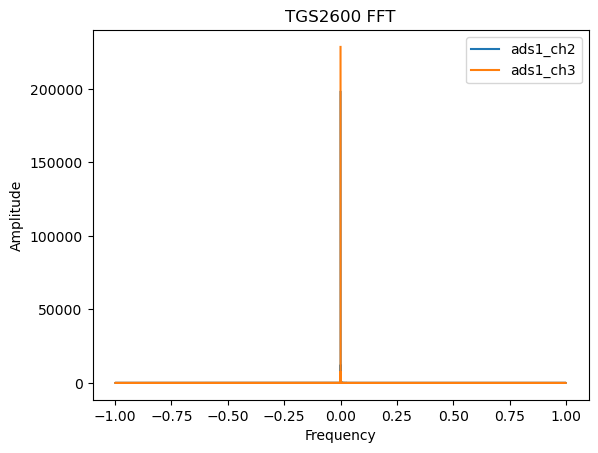

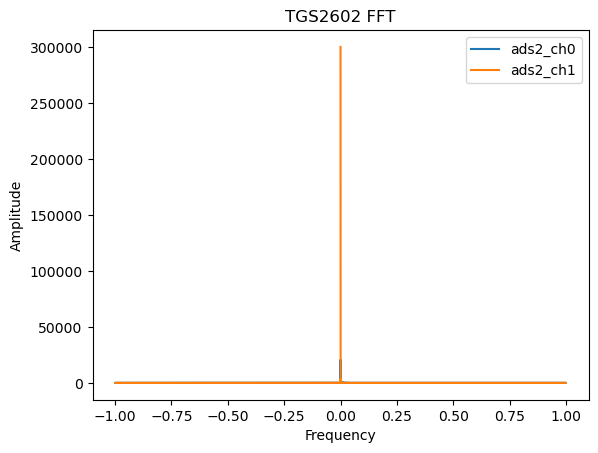

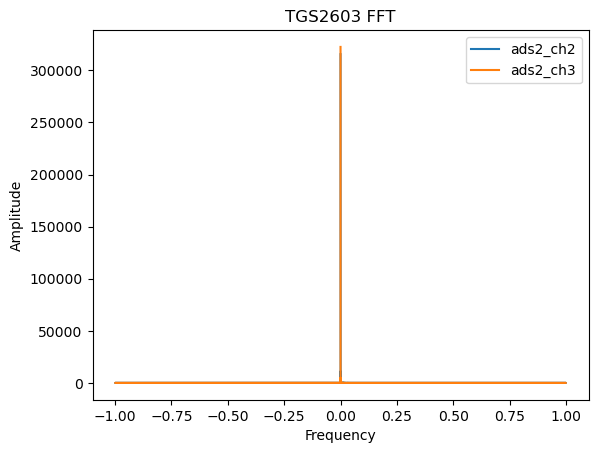

In [33]:
from scipy.fft import fft
from scipy.fft import fftfreq
import numpy as np

def plot_fft_from_csv(csv_file, data1_index, data2_index, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Get the time vector values
    time_vector = df['seconds'].values

    # Get the data series
    data1_series = df.iloc[:, data1_index].values
    data2_series = df.iloc[:, data2_index].values

    # Calculate the FFT
    fft1_values = fft(data1_series)
    fft2_values = fft(data2_series)
    
    # Get the frequency values
    num_samples = len(data1_series)
    sample_rate = np.ceil(num_samples / (time_vector[-1] - time_vector[0]))
    frequencies = fftfreq(num_samples, d=1/sample_rate)

    # Plot the FFT values
    fig, ax = plt.subplots()
    ax.plot(frequencies, np.abs(fft1_values),label=df.columns[data1_index])
    ax.plot(frequencies, np.abs(fft2_values),label=df.columns[data2_index])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')
    ax.set_title(graph_name)
    ax.legend()
    # Show the plot
    plt.show()
    
    
plot_fft_from_csv(output_file, 0, 1, 'TGS2611 FFT')
plot_fft_from_csv(output_file, 2, 3, 'TGS2600 FFT')
plot_fft_from_csv(output_file, 4, 5, 'TGS2602 FFT')
plot_fft_from_csv(output_file, 6, 7, 'TGS2603 FFT')


## Plot Spectrogram

In [ ]:
from scipy.signal import spectrogram

def plot_spectrogram_from_csv(csv_file, data_index, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Get the time vector values
    time_vector = df['seconds'].values

    # Get the data series
    data_series = df.iloc[:, data_index].values

    # Set the sample rate and window parameters for the spectrogram
    sample_rate = 1 / (time_vector[1] - time_vector[0])
    window = 'hann'

    # Calculate the spectrogram
    frequencies, times, spectrogram_data = spectrogram(data_series, fs=sample_rate, window=window)

    # Plot the spectrogram
    fig, ax = plt.subplots()
    im = ax.imshow(10 * np.log10(spectrogram_data), aspect='auto', cmap='inferno')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_title(graph_name)

    # Add a colorbar
    cbar = fig.colorbar(im, ax=ax, label='Power Spectral Density (dB)')

    # Show the plot
    plt.show()
    
    
plot_spectrogram_from_csv(output_file, 0, 'TGS2611 PSD')

## Plot PSD

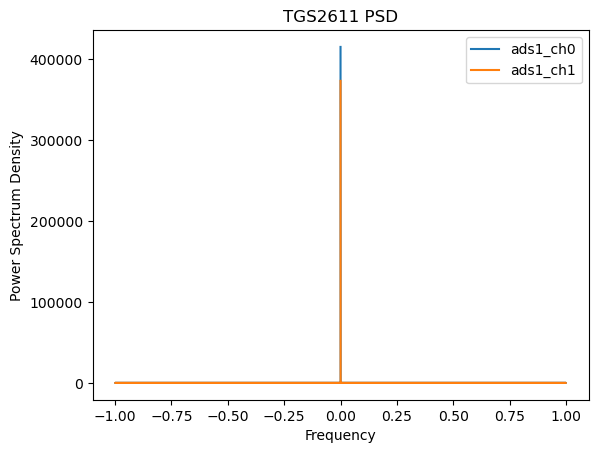

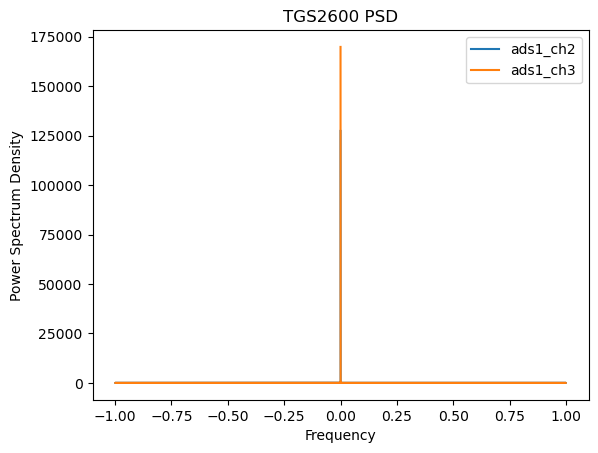

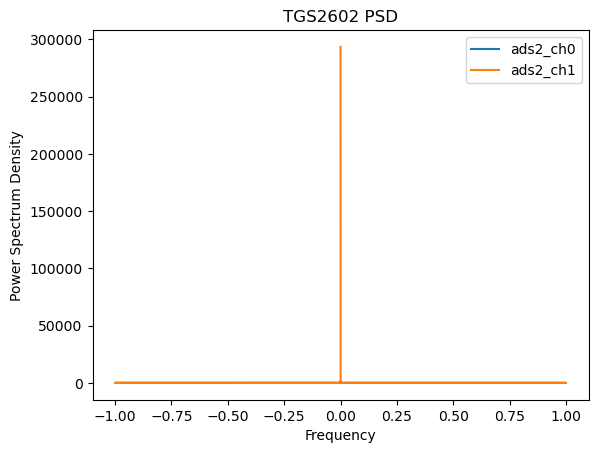

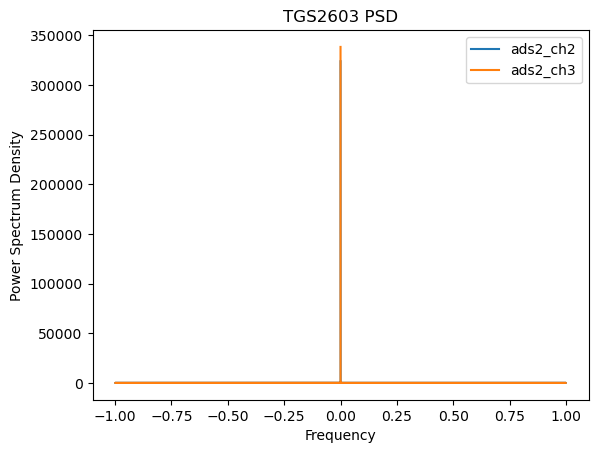

In [23]:
def plot_psd_from_csv(csv_file, data1_index, data2_index, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Get the time vector values
    time_vector = df['seconds'].values

    # Get the data series
    data1_series = df.iloc[:, data1_index].values
    data2_series = df.iloc[:, data2_index].values

    # Calculate the FFT
    fft1_values = fft(data1_series)
    fft2_values = fft(data2_series)

    # Get the frequency values
    num_samples = len(data1_series)
    sample_rate = np.ceil(num_samples / (time_vector[-1] - time_vector[0]))
    frequencies = fftfreq(num_samples, d=1/sample_rate)

    # Calculate the power spectrum density (PSD)
    psd1 = np.abs(fft1_values)**2 / num_samples
    psd2 = np.abs(fft2_values)**2 / num_samples

    # Plot the PSD
    fig, ax = plt.subplots()
    ax.plot(frequencies, psd1,label=df.columns[data1_index])
    ax.plot(frequencies, psd2,label=df.columns[data2_index])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Power Spectrum Density')
    ax.set_title(graph_name)
    ax.legend()

    # Show the plot
    plt.show()
    

plot_psd_from_csv(output_file, 0, 1, 'TGS2611 PSD')
plot_psd_from_csv(output_file, 2, 3, 'TGS2600 PSD')
plot_psd_from_csv(output_file, 4, 5, 'TGS2602 PSD')
plot_psd_from_csv(output_file, 6, 7, 'TGS2603 PSD')


## Plot Welch

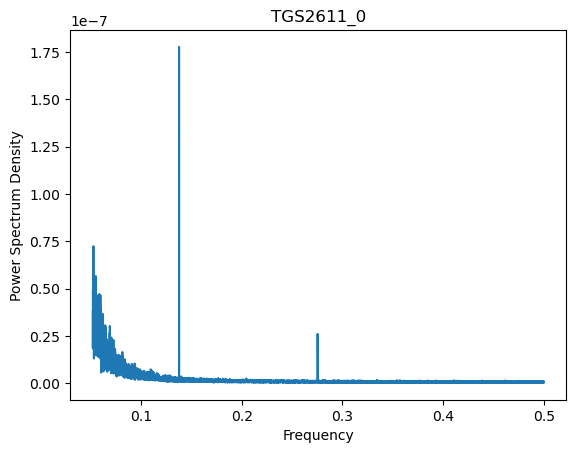

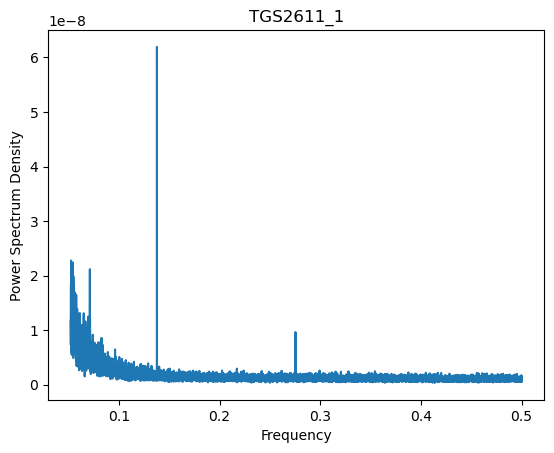

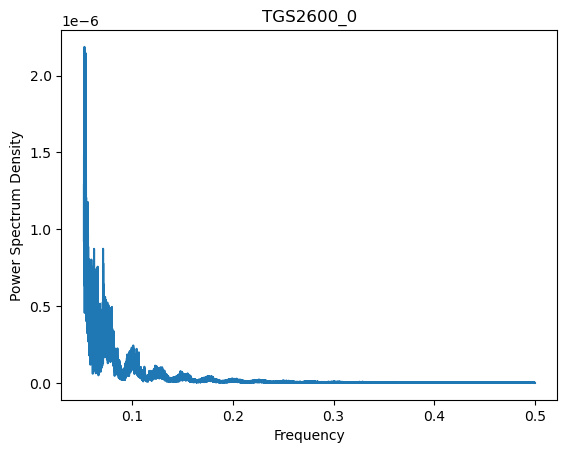

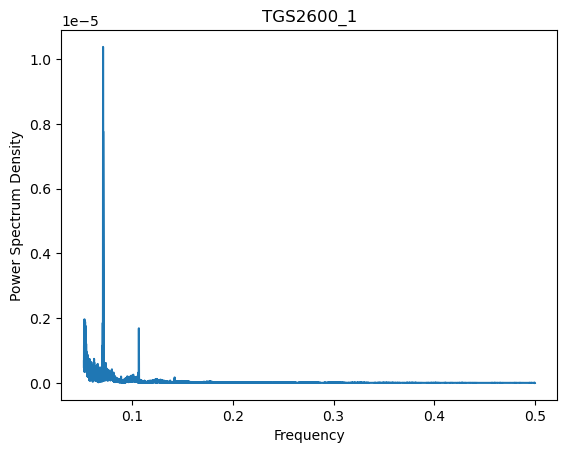

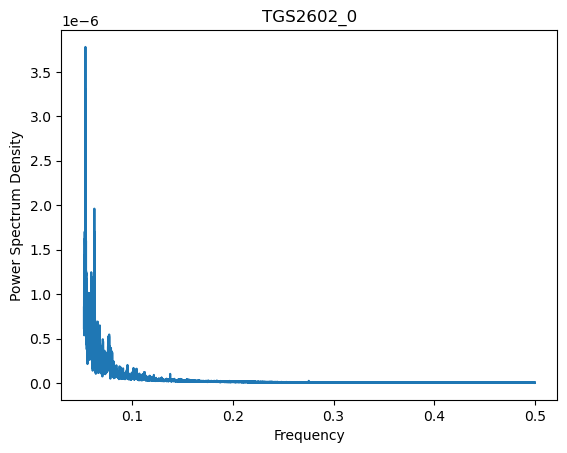

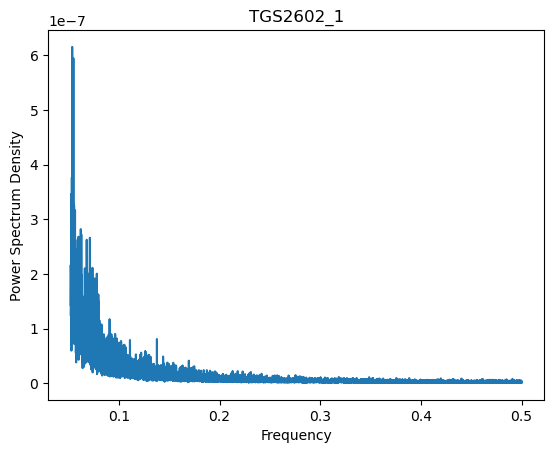

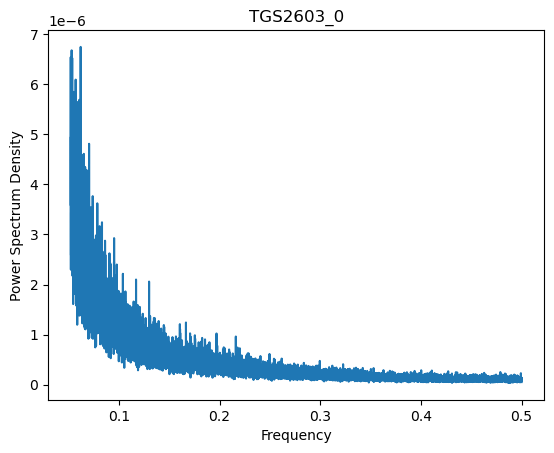

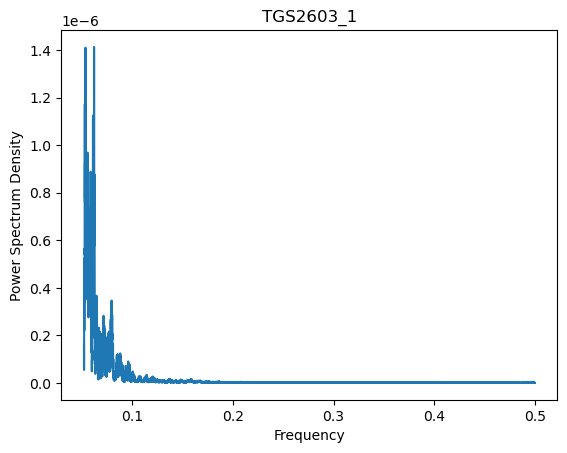

In [34]:
from scipy.signal import welch, hamming

def plot_welch_from_csv(csv_file, data_index, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Get the time vector values
    time_vector = df['seconds'].values

    # Get the data series
    data_series = df.iloc[:, data_index].values

    # Set the parameters for the Welch method
    fs = 1 / np.mean(np.diff(time_vector))  # Sample rate
    nperseg = len(data_series) // 8  # Segment length
    noverlap = nperseg // 2  # Overlap length

    # Calculate the Welch spectrum
    frequencies, welch_spectrum = welch(
        data_series, fs=fs, window=hamming(nperseg), nperseg=nperseg, noverlap=noverlap
    )
    offset = 2000
    frequencies = frequencies[offset:]
    welch_spectrum = welch_spectrum[offset:]

    # Plot the Welch diagram
    fig, ax = plt.subplots()
    ax.plot(frequencies, welch_spectrum)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Power Spectrum Density')
    ax.set_title(graph_name)

    # Show the plot
    plt.show()

plot_welch_from_csv(output_file, 0, 'TGS2611_0')
plot_welch_from_csv(output_file, 1, 'TGS2611_1')
plot_welch_from_csv(output_file, 2, 'TGS2600_0')
plot_welch_from_csv(output_file, 3, 'TGS2600_1')
plot_welch_from_csv(output_file, 4, 'TGS2602_0')
plot_welch_from_csv(output_file, 5, 'TGS2602_1')
plot_welch_from_csv(output_file, 6, 'TGS2603_0')
plot_welch_from_csv(output_file, 7, 'TGS2603_1')